<a href="https://colab.research.google.com/github/KORALLLL/MTUCI_EMNIST/blob/Gleb/gleb_notebook/Gleb_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
  <tr>
    <th>layer</th>
    <th>layer type2</th>
    <th>feature maps</th>
    <th>size</th>
    <th>kernel size</th>
    <th>stride</th>
    <th>activation</th>
  </tr>
  <tr>
    <th>input</th>
    <th>image</th>
    <th>1</th>
    <th>28*28</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
  <tr>
    <th>1</th>
    <th>convoluation</th>
    <th>6</th>
    <th>28*28</th>
    <th>5*5</th>
    <th>1</th>
    <th>tanh</th>
  </tr>
  <tr>
    <th>2</th>
    <th>average pooling</th>
    <th>6</th>
    <th>14*14</th>
    <th>2*2</th>
    <th>2</th>
    <th>tanh</th>
  </tr>
  <tr>
    <th>3</th>
    <th>convoluation</th>
    <th>16</th>
    <th>10*10</th>
    <th>5*5</th>
    <th>1</th>
    <th>tanh</th>
  </tr>
  <tr>
    <th>4</th>
    <th>average pooling</th>
    <th>16</th>
    <th>5*5</th>
    <th>2*2</th>
    <th>2</th>
    <th>tanh</th>
  </tr>
  <tr>
    <th>5</th>
    <th>fully connected</th>
    <th>-</th>
    <th>120</th>
    <th>-</th>
    <th>-</th>
    <th>tanh</th>
  </tr>
  <tr>
    <th>6</th>
    <th>fully connected</th>
    <th>-</th>
    <th>84</th>
    <th>-</th>
    <th>-</th>
    <th>tanh</th>
  </tr>
  <tr>
    <th>output</th>
    <th>fully connected</th>
    <th>-</th>
    <th>10</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
</table>

train dataset: MNIST + EMNIST letters

test dataset: dataset of DreamTeam

training sample size: 36960

testing sample size: 16784

loss finction: Cross Entropy Loss

optimizer: adam

learning rate: 0.001

batch size: 560

epoch number: 100

In [4]:
import torch
import torchvision.datasets
import torchvision.transforms as transforms
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as bar
import pickle
import numpy as np

In [5]:
!git clone https://github.com/KORALLLL/MTUCI_EMNIST.git

Cloning into 'MTUCI_EMNIST'...
remote: Enumerating objects: 36413, done.
remote: Counting objects: 100% (12773/12773), done.
remote: Compressing objects: 100% (12656/12656), done.
remote: Total 36413 (delta 144), reused 12685 (delta 113), pack-reused 23640
Receiving objects: 100% (36413/36413), 128.74 MiB | 30.98 MiB/s, done.
Resolving deltas: 100% (429/429), done.


In [6]:
emnist_train = torchvision.datasets.EMNIST('./', split='letters', download = True, train = True)
mnist_train = torchvision.datasets.EMNIST('./', split='mnist', download = True, train = True)
emnist_val = torchvision.datasets.EMNIST('./', split='letters', download = True, train = False)
mnist_val = torchvision.datasets.EMNIST('./', split='mnist', download = True, train = False)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

emnist_train_data = emnist_train.data
mnist_train_data = mnist_train.data
train_data = torch.cat([emnist_train_data[:24960], mnist_train_data[:12000]], dim=0).float().unsqueeze(1).to(device) / 255

emnist_val_data = emnist_val.data
mnist_val_data = mnist_val.data
val_data = torch.cat([emnist_val_data, mnist_val_data], dim=0).float().unsqueeze(1).to(device) / 255

temp_emnist_train_labels = emnist_train.targets[:24960]
emnist_train_labels = []

temp_emnist_val_labels = emnist_val.targets
emnist_val_labels = []

for i in range(len(temp_emnist_train_labels)):
  if temp_emnist_train_labels[i]==15:
    emnist_train_labels.append(torch.tensor(0))
  elif temp_emnist_train_labels[i]>15:
    emnist_train_labels.append(temp_emnist_train_labels[i]+8)
  else:
    emnist_train_labels.append(temp_emnist_train_labels[i]+9)

for i in range(len(temp_emnist_val_labels)):
  if temp_emnist_val_labels[i]==15:
    emnist_val_labels.append(torch.tensor(0))
  elif temp_emnist_val_labels[i]>15:
    emnist_val_labels.append(temp_emnist_val_labels[i] + 8)
  else:
    emnist_val_labels.append(temp_emnist_val_labels[i]+9)

mnist_train_labels = mnist_train.targets
train_labels = torch.cat([torch.stack(emnist_train_labels[:24960]), mnist_train_labels[:12000]], dim=0).to(device)

mnist_val_labels = mnist_val.targets
val_labels = torch.cat([torch.stack(emnist_val_labels), mnist_val_labels], dim=0).to(device)


file = open('MTUCI_EMNIST/dataset.pkl', 'rb')
test_dataset = pickle.load(file)
file.close()

test_data = test_dataset['data'].numpy()
test_data = np.flip(test_data, axis = 3)
test_data = np.rot90(test_data, k=1, axes=(2,3))
test_data = 1 - test_data
test_data = torch.from_numpy(test_data).float().to(device)
test_labels = test_dataset['targets'].to(device)

100%|██████████| 561753746/561753746 [00:10<00:00, 54858893.21it/s]


Extracting ./EMNIST/raw/gzip.zip to ./EMNIST/raw


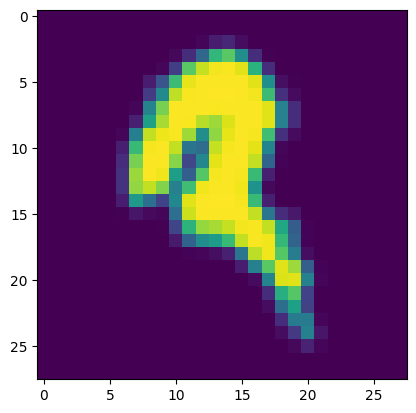

In [7]:
plt.imshow(val_data[0][0].cpu())

In [8]:
class LeNet(torch.nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 5, padding = 2)
    self.act1 = torch.nn.Tanh()
    self.pool1 = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)
    self.act2 = torch.nn.Tanh()
    self.conv2 = torch.nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, padding = 0)
    self.act3 = torch.nn.Tanh()
    self.pool2 = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)
    self.act4 = torch.nn.Tanh()
    self.fc1 = torch.nn.Linear(400, 120)
    self.act5 = torch.nn.Tanh()
    self.fc2 = torch.nn.Linear(120, 84)
    self.act6 = torch.nn.Tanh()
    self.fc3 = torch.nn.Linear(84, 35)

  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    x = self.pool1(x)
    x = self.act2(x)
    x = self.conv2(x)
    x = self.act3(x)
    x = self.pool2(x)
    x = self.act4(x)
    x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
    x = self.fc1(x)
    x = self.act5(x)
    x = self.fc2(x)
    x = self.act6(x)
    x = self.fc3(x)

    return x

In [14]:
lenet = LeNet().to(device)

In [15]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet.parameters(), lr = 0.001)

In [16]:
train_accuracy = []
validation_accuracy = []
test_accuracy = []
train_loss = []
validation_loss = []
test_loss = []

In [17]:
batch_size = 560
for epoch in bar(range(100), desc = 'learning'):
  indexs = np.random.permutation(len(train_data))
  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()
    batch_index = indexs[start_index: start_index + batch_size]
    labels_batch = train_labels[batch_index].to(device)

    images_batch = train_data[batch_index].to(device)
    prediction = lenet.forward(images_batch)
    loss_value = loss(prediction, labels_batch)
    loss_value.backward()
    optimizer.step()

  prediction_train = lenet.forward(train_data)
  prediction_validation = lenet.forward(val_data)
  prediction_test = lenet.forward(test_data)
  train_loss.append(loss(prediction_train, train_labels).data.cpu())
  validation_loss.append(loss(prediction_validation, val_labels).data.cpu())
  test_loss.append(loss(prediction_test, test_labels).data.cpu())

  train_acc = (prediction_train.argmax(dim = 1) == train_labels).float().mean().data.cpu()
  validation_acc = (prediction_validation.argmax(dim = 1) == val_labels).float().mean().data.cpu()
  test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()

  train_accuracy.append(train_acc)
  validation_accuracy.append(validation_acc)
  test_accuracy.append(test_acc)




<ipython-input-17-d8dbedc808d4>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(100), desc = 'learning'):


learning:   0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 0, 'epoch')

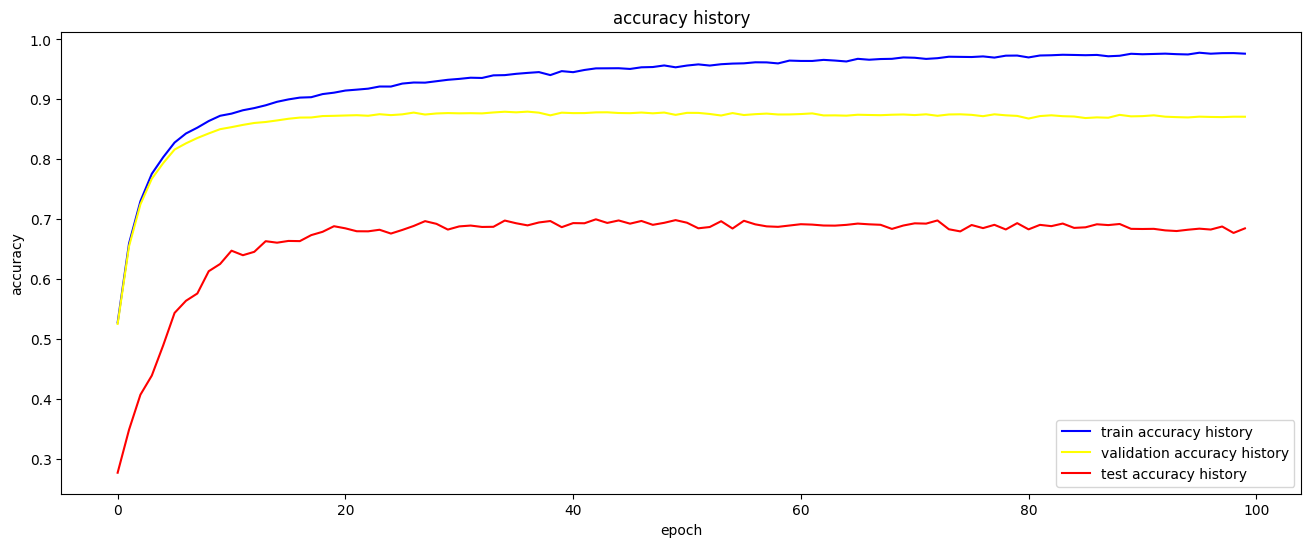

In [24]:
plt.figure(figsize= (16.0, 6.0))
plt.plot(range(100), train_accuracy, c = 'blue', label = 'train accuracy history')
plt.plot(range(100), validation_accuracy, c = 'yellow', label = 'validation accuracy history')
plt.plot(range(100), test_accuracy, c = 'red', label = 'test accuracy history')
plt.legend(loc = 'lower right')
plt.title('accuracy history')
plt.ylabel('accuracy')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

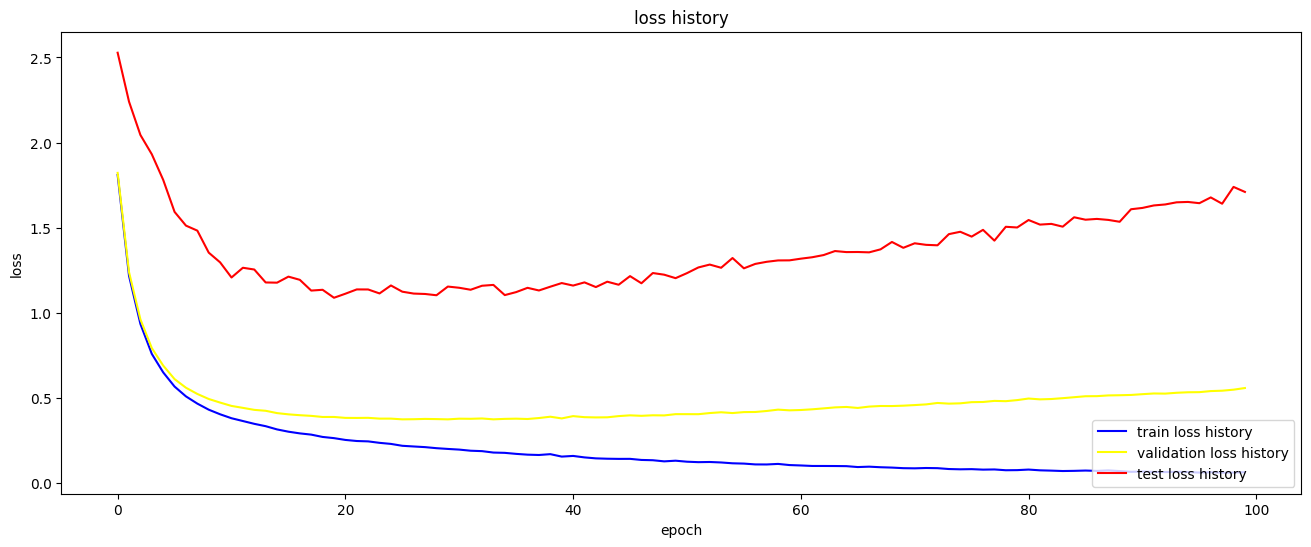

In [22]:
plt.figure(figsize= (16.0, 6.0))
plt.plot(range(100), train_loss, c = 'blue', label = 'train loss history')
plt.plot(range(100), validation_loss, c = 'yellow', label = 'validation loss history')
plt.plot(range(100), test_loss, c = 'red', label = 'test loss history')
plt.legend(loc = 'lower right')
plt.title('loss history')
plt.ylabel('loss')
plt.xlabel('epoch')